**D3APL: Aplicações em Ciência de Dados** <br/>
IFSP Campinas

Prof. Dr. Samuel Martins (Samuka) <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

# Multilayer Perceptron (MLP) with Keras - v2
We use the same data from the previous version but we **do not** _flat the data manually_. <br/>
Execute all steps ahead and stop at Section 2.

In this version we:
- Use the _Flatten_ Layer to _flat_ our _input data_
- Add regularization to our MLP

## 1. Set up

#### 1.1 TensorFlow + Keras

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.8.0'

In [3]:
keras.__version__

'2.8.0'

**GPU available?**

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### 1.2 Fixing the seed for reproducibility (optional)
That's a try for reprodubility in Keras. See more on: <br/>
https://machinelearningmastery.com/reproducible-results-neural-networks-keras/ <br/>
https://www.tensorflow.org/api_docs/python/tf/random/set_seed

In [5]:
from numpy.random import seed
from tensorflow.random import set_seed

seed(42)
set_seed(42)

#### 1.3 Other imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#### 1.4 Loading Fashion MNIST Dataset via Keras
https://keras.io/api/datasets/fashion_mnist/

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

The dataset is already split into a training set and a test set.

In [8]:
# download done in folder: "~/.keras/datasets"
import os
os.listdir(os.path.expanduser('~/.keras/datasets'))

['fashion-mnist', 'mnist.npz']

In [9]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}\n')

print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)

X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [10]:
print(f'Number of Classes: {np.unique(y_train).shape[0]}')
print(f'Classes: {np.unique(y_train)}')

Number of Classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

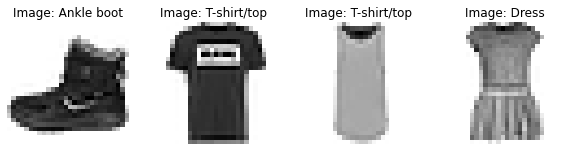

In [12]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f'Image: {class_names[label]}')

In [13]:
# 8-bit gray scale
print(f'Min. value of X_train: {X_train.min()}')
print(f'Max. value of X_train: {X_train.max()}\n')

print(f'Min. value of X_train: {X_train.min()}')
print(f'Max. value of X_train: {X_train.max()}')

Min. value of X_train: 0
Max. value of X_train: 255

Min. value of X_train: 0
Max. value of X_train: 255


#### 1.5 (Simple) Feature scaling
Since we are going to train the neural network using _Gradient Descent_, we must scale the **input features**. For simplicity, we’ll scale the pixel intensities down to the _0–1_ range by dividing them by **255.0** (8-bit gray image):

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
# rescaled 8-bit gray scale
print(f'Min. value of X_train: {X_train.min()}')
print(f'Max. value of X_train: {X_train.max()}\n')

print(f'Min. value of X_train: {X_train.min()}')
print(f'Max. value of X_train: {X_train.max()}')

Min. value of X_train: 0.0
Max. value of X_train: 1.0

Min. value of X_train: 0.0
Max. value of X_train: 1.0


## 2. Building and Training a MLP via Keras

### 2.1 Defining the Network Architecture
Proposed architecture for Multiclass Classification:
- Input Layer: 784 neurons (number of pixels)
- Hidden Layer 1: 256 neurons, ReLu, **_He initialization_, L2-regularization**
- Hidden Layer 2: 128 neurons, ReLu, **_He initialization_, L2-regularization**
- Output Layer: 10 neurons, Softmax, **_Glorot initialization_ (default), L2-regularization**


In short: [784], [256 ReLU, 128 ReLU], [10 Softmax] ==> pyramid

#### **Defining the Network's Architecture**

In [16]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')

X_train.shape: (60000, 28, 28)
X_test.shape: (10000, 28, 28)


In [17]:
input_shape = X_train.shape[1:]
input_shape

(28, 28)

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l2


model = Sequential([
    Flatten(input_shape=input_shape, name='Input'),
    Dense(300, activation='relu', name='Hidden_1',
          kernel_initializer='he_normal',
          kernel_regularizer=l2(0.01)),  # no penalization/regularization on biases
    Dense(100, activation='relu', name='Hidden_2',
          kernel_initializer='he_normal',
          kernel_regularizer=l2(0.01)),  # no penalization/regularization on biases
    Dense(10, activation='softmax', name='Output',
          kernel_regularizer=l2(0.01))
], name='MyMLP')

In [19]:
model.summary()

Model: "MyMLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 784)               0         
                                                                 
 Hidden_1 (Dense)            (None, 300)               235500    
                                                                 
 Hidden_2 (Dense)            (None, 100)               30100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 2.2 Compiling: Defining the Loss Function, Optimizer, and Metrics

In [20]:
# Model compilation: https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 2.4 Training

In case of GPU drivers, we can monitor its use by [_gpustat_](https://github.com/wookayin/gpustat).

On terminal, use: `gpustat -cpi`


In [21]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 7.0510 - accuracy: 0.7525 - val_loss: 5.2764 - val_accuracy: 0.8113
Epoch 2/30
1500/1500 [==============================] - 2s 2ms/step - loss: 4.1800 - accuracy: 0.8149 - val_loss: 3.2936 - val_accuracy: 0.8095
Epoch 3/30
1500/1500 [==============================] - 2s 2ms/step - loss: 2.6841 - accuracy: 0.8193 - val_loss: 2.1969 - val_accuracy: 0.8209
Epoch 4/30
1500/1500 [==============================] - 2s 2ms/step - loss: 1.8690 - accuracy: 0.8231 - val_loss: 1.5967 - val_accuracy: 0.8227
Epoch 5/30
1500/1500 [==============================] - 2s 2ms/step - loss: 1.4214 - accuracy: 0.8239 - val_loss: 1.2765 - val_accuracy: 0.8196
Epoch 6/30
1500/1500 [==============================] - 2s 2ms/step - loss: 1.1758 - accuracy: 0.8238 - val_loss: 1.0899 - val_accuracy: 0.8256
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0396 - accuracy: 0.8251 - val_loss: 0.9989 - val_accuracy:

#### **Visualizing the training history**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,7.051044,0.752500,5.276390,0.811333
1,4.180005,0.814854,3.293563,0.809500
2,2.684061,0.819313,2.196913,0.820917
3,1.868967,0.823146,1.596701,0.822750
4,1.421430,0.823896,1.276504,0.819583
5,1.175776,0.823833,1.089947,0.825583
6,1.039566,0.825146,0.998932,0.820500
7,0.963750,0.824042,0.938217,0.824833
8,0.920854,0.824625,0.907730,0.821750
9,0.897291,0.825188,0.892249,0.821667


Text(0, 0.5, 'Score')

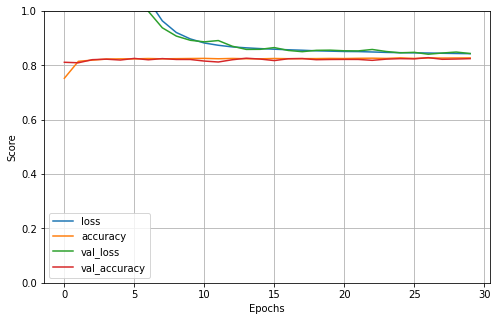

In [23]:
history_df.plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('Epochs')
plt.ylabel('Score')

The _training set_ performance ends up beating the _validation performance_, as is generally the case when you train for long enough. <br/>
You can tell that the model _has not quite converged yet_, as the _validation loss_ is still (or could be) going down, so you should probably
**continue training**.

It’s as simple as calling the `fit()` method again, since Keras **_just_ continues training where it left off**.

In [24]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.8421 - accuracy: 0.8260 - val_loss: 0.8448 - val_accuracy: 0.8242
Epoch 2/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.8413 - accuracy: 0.8279 - val_loss: 0.8524 - val_accuracy: 0.8188
Epoch 3/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.8409 - accuracy: 0.8264 - val_loss: 0.8453 - val_accuracy: 0.8248
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8409 - accuracy: 0.8279 - val_loss: 0.8382 - val_accuracy: 0.8267
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8397 - accuracy: 0.8280 - val_loss: 0.8436 - val_accuracy: 0.8238
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8394 - accuracy: 0.8270 - val_loss: 0.8368 - val_accuracy: 0.8253
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8387 - accuracy: 0.8287 - val_loss: 0.8435 - val_accuracy:

Note that our _training loss_ is lower than that from the last epoch in the previous training. This confirms that our `fit()` method **continues training** where it left off.

#### **More about training in Keras**
Extracted from "A. Géron, Hands-on Machine Learning (Chapter 10)".

If the training set was _very skewed_, with some classes being _overrepresented_ and others _underrepresented_, it would be useful to set the `class_weight` argument when calling the `fit()` method, which would give a **larger weight** to _underrepresented classes_ and a **lower weight** to _overrepresented classes_. These weights would be used by Keras when _computing the loss_.

If you need _per-instance weights_, set the `sample_weight` argument (if both `class_weight` and `sample_weight` are provided, Keras **multiplies them**).

_Per-instance weights_ could be useful if some instances were labeled by _experts_ while others were labeled using a _crowdsourcing platform_: you might want to give more weight to the former.

#### **Saving a Model**
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#save

In [25]:
model.save('./models/mlp_keras_fashionmnist_v2.h5')

See also:
- `save_spec`: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#save_spec
- `save_weights`: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#save_weights

#### **Loading a Model**
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#example_8

In [26]:
from keras.models import load_model

model_loaded = load_model('./models/mlp_keras_fashionmnist_v2.h5')

In [27]:
model_loaded.summary()

Model: "MyMLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 784)               0         
                                                                 
 Hidden_1 (Dense)            (None, 300)               235500    
                                                                 
 Hidden_2 (Dense)            (None, 100)               30100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


See also:
- `load_weights`: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#load_weights

### 2.5 Evaluating and Predicting New Samples

#### **Evaluation**
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#evaluate

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8525 - accuracy: 0.8156


[0.8524917960166931, 0.8155999779701233]

#### **Prediction**
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict

In [29]:
y_test_proba = model.predict(X_test)
y_test_proba

array([[1.3699057e-03, 2.4915677e-03, 8.5041689e-04, ..., 3.3995795e-01,
        2.6214853e-02, 4.3170729e-01],
       [3.9845174e-03, 1.4900574e-03, 7.9491180e-01, ..., 3.0248468e-06,
        3.6170413e-03, 4.4216249e-05],
       [6.7771896e-04, 9.9503976e-01, 6.0487958e-04, ..., 4.1791218e-04,
        2.2058134e-06, 3.1866238e-04],
       ...,
       [1.0047298e-01, 6.2928646e-04, 5.2322401e-03, ..., 3.9322814e-03,
        6.3861781e-01, 2.9498944e-03],
       [2.4738058e-03, 9.5874059e-01, 1.6115771e-03, ..., 4.2394283e-03,
        3.2179418e-05, 6.4897520e-04],
       [2.8179972e-03, 3.3913883e-03, 6.5038786e-03, ..., 2.5696045e-01,
        4.9508613e-02, 4.3422025e-02]], dtype=float32)

#### **Class Prediction**
https://stackoverflow.com/a/69503180/7069696

In [30]:
y_test_pred = np.argmax(y_test_proba, axis=1)
y_test_pred

array([9, 2, 1, ..., 8, 1, 5])

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, target_names=[name for name in class_names]))

              precision    recall  f1-score   support

 T-shirt/top       0.75      0.81      0.78      1000
     Trouser       0.97      0.94      0.96      1000
    Pullover       0.76      0.64      0.70      1000
       Dress       0.83      0.85      0.84      1000
        Coat       0.68      0.78      0.73      1000
      Sandal       0.91      0.89      0.90      1000
       Shirt       0.57      0.50      0.53      1000
     Sneaker       0.88      0.89      0.88      1000
         Bag       0.92      0.93      0.92      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.81      0.82      0.81     10000
weighted avg       0.81      0.82      0.81     10000



# Exercise

Repeat all steps shown in this notebook for the MNIST dataset available in Keras: <br/>
https://keras.io/api/datasets/mnist/